In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.models import load_model
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
speed_mapping = {
    0: "20",
    1: "30",
    2: "50",
    3: "60",
    4: "70",
    5: "80",
    6: "End Of Limit",
    7: "100",
    8: "120",
}

others_mapping = {
    9: "Interdiction de dépasser",
    10: "interdiction de dépasser pour poids lourd",
    11: "Voie prioritaire",
    12: "priorité à droite",
    13: "Laisser passer",
    14: "Stop",
    15: "Interdit au véhicules",
    16: "Interdit au poids lourd",
    17: "Sens interdit",
    18: "Attention",
    19: "Attention virage à gauche",
    20: "Attention virage à droite",
    21: "Succession de virage",
    22: "Dos d'ane",
    23: "Risque dérapage",
    24: "Voie rétrécie",
    25: "Attention travaux",
    26: "Feu tricolore",
    27: "Attention piéton",
    28: "Attention enfants",
    29: "Attention vélo",
    30: "Attention gel",
    31: "Attention animaux",
    32: "Fin d'interdiction",
    33: "Tourner à droite",
    34: "Tourner à gauche",
    35: "Continuer tout droit",
    36: "Tout Droit ou Droite",
    37: "Tout Droit ou Gauche",
    38: "Placer vous à droite",
    39: "Placer vous à gauche",
    40: "Rond point",
    41: "Fin Interdiction de dépasser",
    42: "Fin interdiction de dépasser poids lourds"
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Binary Model: Classified as Non-Speed Sign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Non-Speed Sign: Stop


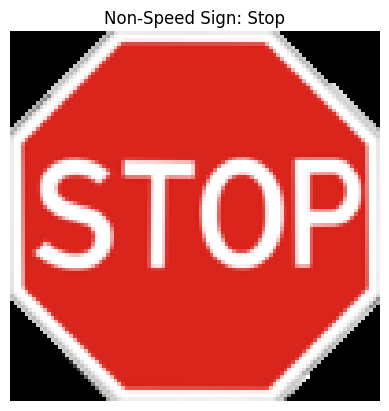

In [ ]:
# --- Loading models ---
binary_model = tf.keras.models.load_model('../modelsROI/best_binary_model.keras')
whichSpeed_model = tf.keras.models.load_model('../modelsROI/best_whichSpeed_model.keras')
whichSign_model = tf.keras.models.load_model('../modelsROI/best_whichSign_model.keras')

# --- Defining image preprocessing parameters ---
im_height = 100  
im_width = 100

# --- Loading and preprocessing the image ---
# img_path = "../gtsrb-german-traffic-sign/versions/1/Meta/2.png"  
# img_path = "../gtsrb-german-traffic-sign/versions/1/Meta/12.png"  
img_path = "./gtsrb-german-traffic-sign/versions/1/Meta/14.png"  

img = image.load_img(img_path, target_size=(im_height, im_width))
img_array = image.img_to_array(img) / 255.0
img_batch = np.expand_dims(img_array, axis=0)

# --- Stage 1: Binary Classification ---
binary_pred_prob = binary_model.predict(img_batch)[0][0]
if binary_pred_prob > 0.5:
    print("Binary Model: Classified as Speed Sign")
    # --- Stage 2A: Which Speed Sign? ---
    speed_pred_probs = whichSpeed_model.predict(img_batch)[0]
    speed_pred = np.argmax(speed_pred_probs)  # Expected output range: 0 to 8
    predicted_sign = speed_mapping.get(speed_pred, "Unknown Speed Sign")
    final_result = f"Speed Sign: {predicted_sign}"
else:
    print("Binary Model: Classified as Non-Speed Sign")
    # --- Stage 2B: Which Non-Speed Sign? ---
    others_pred_probs = whichSign_model.predict(img_batch)[0]
    others_pred = np.argmax(others_pred_probs)  # Expected output range: 0 to (# non-speed classes - 1)
    actual_others_class = others_pred + 9
    predicted_sign = others_mapping.get(actual_others_class, "Unknown Non-Speed Sign")
    final_result = f"Non-Speed Sign: {predicted_sign}"

print(final_result)

# --- Displaying the image with the prediction result ---
plt.imshow(img)
plt.title(final_result)
plt.axis("off")
plt.show()